In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from math import sqrt
from scipy.stats import linregress

#This sets up plotting
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

data = pd.read_pickle("./data_frames/clean_data.pkl")

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


0.76255727861705302

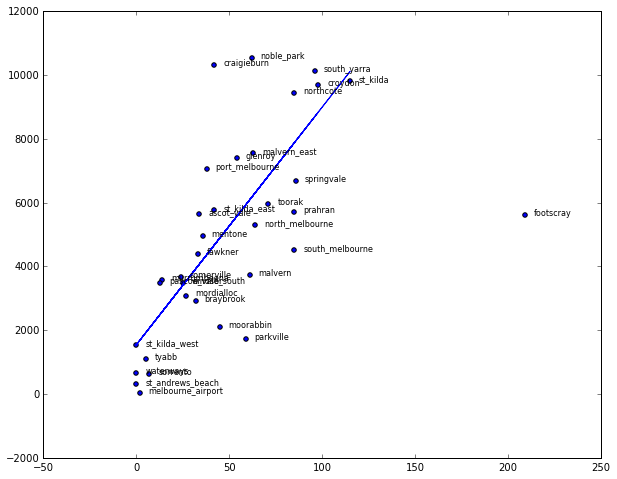

In [109]:
services = pd.DataFrame(data["services"][[col for col in data["services"].columns if col not in ["aged_care_services_high", "aged_care_services_low", "aged_care_srs"]]])
services["sum"] = services.sum(axis=1)

for place in data.index:
    plt.annotate(
        place, (
            services.loc[place]["sum"] + 5, 
            data.loc[place]["socio_demographic"]["occupied_private_dwellings"] - 5
        ), size=8
    )

no_footscray = [place for place in data.index if place != "footscray"]
x = services.loc[no_footscray]["sum"]
y = data.loc[no_footscray]["socio_demographic"]["occupied_private_dwellings"]

m,c,r,_,_ = linregress(x, y)

plt.scatter(services["sum"], data["socio_demographic"]["occupied_private_dwellings"])
plt.plot(x, [xi * m + c for xi in x])

r

In [36]:
growth = pd.DataFrame(data["2012_population"] - data["2007_population"])
growth.sort("total_persons")["total_persons"]
#data.sort(("2007_2012_population_change", "pct_total"))["2007_2012_population_change"]

st_kilda_west         -218.099954
sorrento               -62.000000
toorak                 -35.333265
st_andrews_beach        87.413799
moorabbin              116.000210
somerville             199.347506
murrumbeena            282.000076
malvern_east           345.999988
windsor                468.000000
mordialloc             492.666664
pascoe_vale_south      601.133362
st_kilda_east          667.177946
malvern                695.455675
tyabb                  700.383613
fawkner                767.000255
prahran                960.000045
parkville             1002.799968
south_melbourne       1021.946512
port_melbourne        1214.085714
ascot_vale            1219.875070
braybrook             1223.000096
mentone               1436.425771
waterways             1638.578974
glenroy               1665.207377
northcote             1698.999951
north_melbourne       1859.700000
croydon               1909.361149
springvale            1979.000134
footscray             2058.333353
st_kilda      